<a href="https://colab.research.google.com/github/Avit-hodibu/Regression/blob/main/Bias_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bias = inablity to fit with training model

high bias = means it doesnot aline well with train model

low bias = means it aline well with train model

Variance= difference of fit in different data set. For this test and train data.

For eg: if train set giving 80 error and test giving 20 error than there is 60 variance

low variance= when test and train have similar error

high variance = when train and test higher difference in error

Overfitting: if pred line perfect matches with training data. Training error is low and testing error is high. low b and high v

Underfitting: does not perform well with train and test data. High bias and low var

We need to chose low bias and low variance model. This is bias variance trade-off



To remove overfitting there is 3 method
1. Regularization
2. Bagging
3. Boosting

# Regularization
Regularization is a set of methods for reducing overfitting in machine learning models.

Type:
1. Ridge(L2)
2. LASSO(L1)
3. Elastic Net : combo of L1 and L2



Overfitting in terms of linear regression model is coefficent value is high. y= mx+c , where m is always high when overfitting . If m value is very low then it is underfitting.

So, if we want to eliminite overfitting then we must decrease the value of m.



## Ridge(L2):
We take out training best line(L1) and we also take testing best line(L2)(this is just a suggestion line).

we have to convince our model that choose L2 line not L1.

How we do is?

we need to add lambda(m^2) in loss function. lambda is hyperparameter

lambda=1 for both line.

L= sum of i to n (yi -y hat)^2 + lambda(m^2)

L1 loss func is more than L2 loss func so, model will choose L2

For each coeff you need to m^2 to each.


As a whole is to add lambda(m^2) term so that model wont overfit



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
data= load_diabetes()

In [ ]:
X = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
L= LinearRegression()

In [ ]:
L.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = L.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2_score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score 0.5188113124539249
RMSE 48.72713760953253


In [ ]:
from sklearn.linear_model import Ridge
R= Ridge(alpha= 0.0001) #alpha is lambda
R.fit(X_train, y_train)
y_pred1 = R.predict(X_test)
print("R2_score", r2_score(y_test, y_pred1))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2_score 0.5189732635884949
RMSE 48.71893700181956


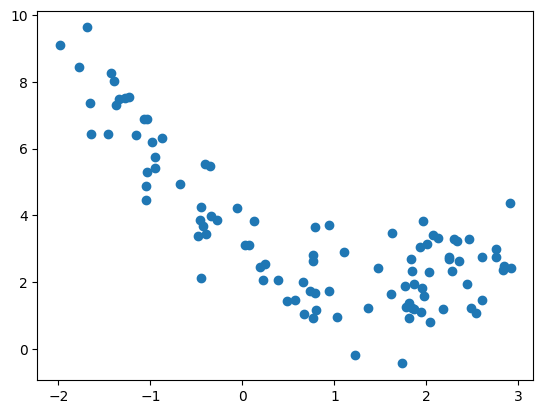

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

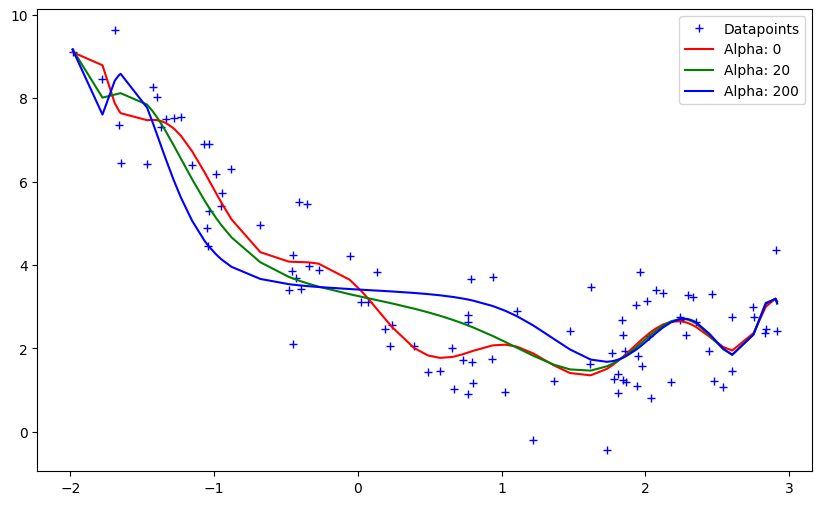

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

alpha =0 is ovetfitting
alpha = 200 is underfitting
alpha = 20 is good

L= sum of i to n (yi -y hat)^2 + lambda(m^2)

dL/ dm = 0
m= (sum i to n (yi - y hat)(Xi - X hat))/(sum i to n (Xi - Xhat)^2 + lambda)

bigger the lambda = alpha hyperparameter m will decrease.





In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

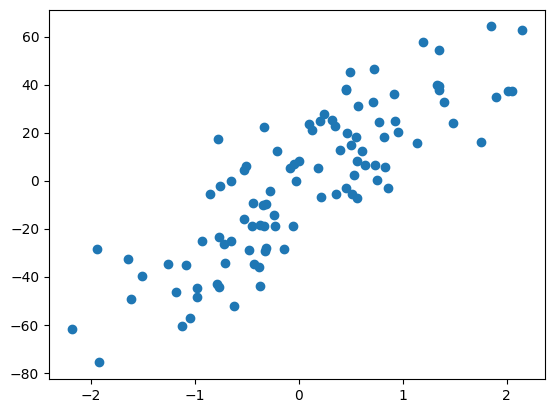

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [4]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [5]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


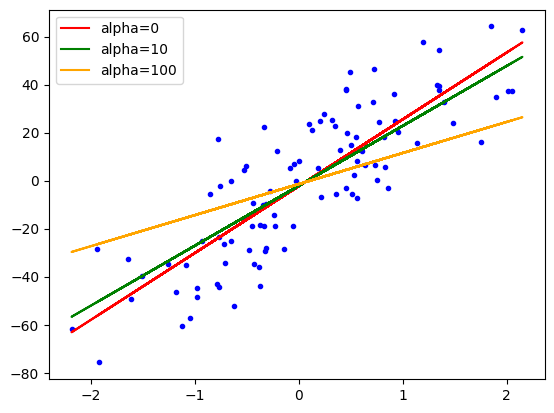

In [6]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

**Writing own code**

In [7]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()

    num = 0
    den = 0

    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)

    m = num/(den + alpha)
    b = y_mean - m*x_mean

    return m,b

In [19]:
class myRidge:

    def __init__(self,alpha):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)

    def predict(X_test):
        pass

In [20]:
reg = myRidge(alpha=10)

In [21]:
reg.fit(X,y)

[24.9546267] [-2.126913]


**Higher dimension data**

W = m col

L= (XW - Y)transpose . (XW - Y) = normal LR

with ridge
L= (XW - Y)transpose . (XW - Y) + lambda ||w||^2

lambda ||w||^2 = lambda wo^2+lambda w1^2+...+lambda wn^2

So,
L= (XW - Y)transpose . (XW - Y) + lambda (W)transpose . W

dL/dW = 0

this gives:

W = (X transpose . X + lambda I)^-1 X transpose . Y

I = identity matrix




In [22]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [23]:
X,y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)


0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


**Own code**

In [24]:
class MeraRidge:

    def __init__(self,alpha=0.1):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)


0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281


**using GD**